# Prediction of producer investigation
This notebook allows to:
- visualize the predictions of the producer

In [1]:
import importlib
from functools import partial
from utils import *

root_dir = add_root_to_path(3)

import skimage.morphology
import sep._commons.visuals as visuals

## Prepare dataset

In [2]:
import sep.loaders.images
data_root = pick_path([root_dir / "tests" / "input" / "basics"])
dataset = data_root / "humans"
data_loader = sep.loaders.images.ImagesLoader.from_tree(str(dataset))

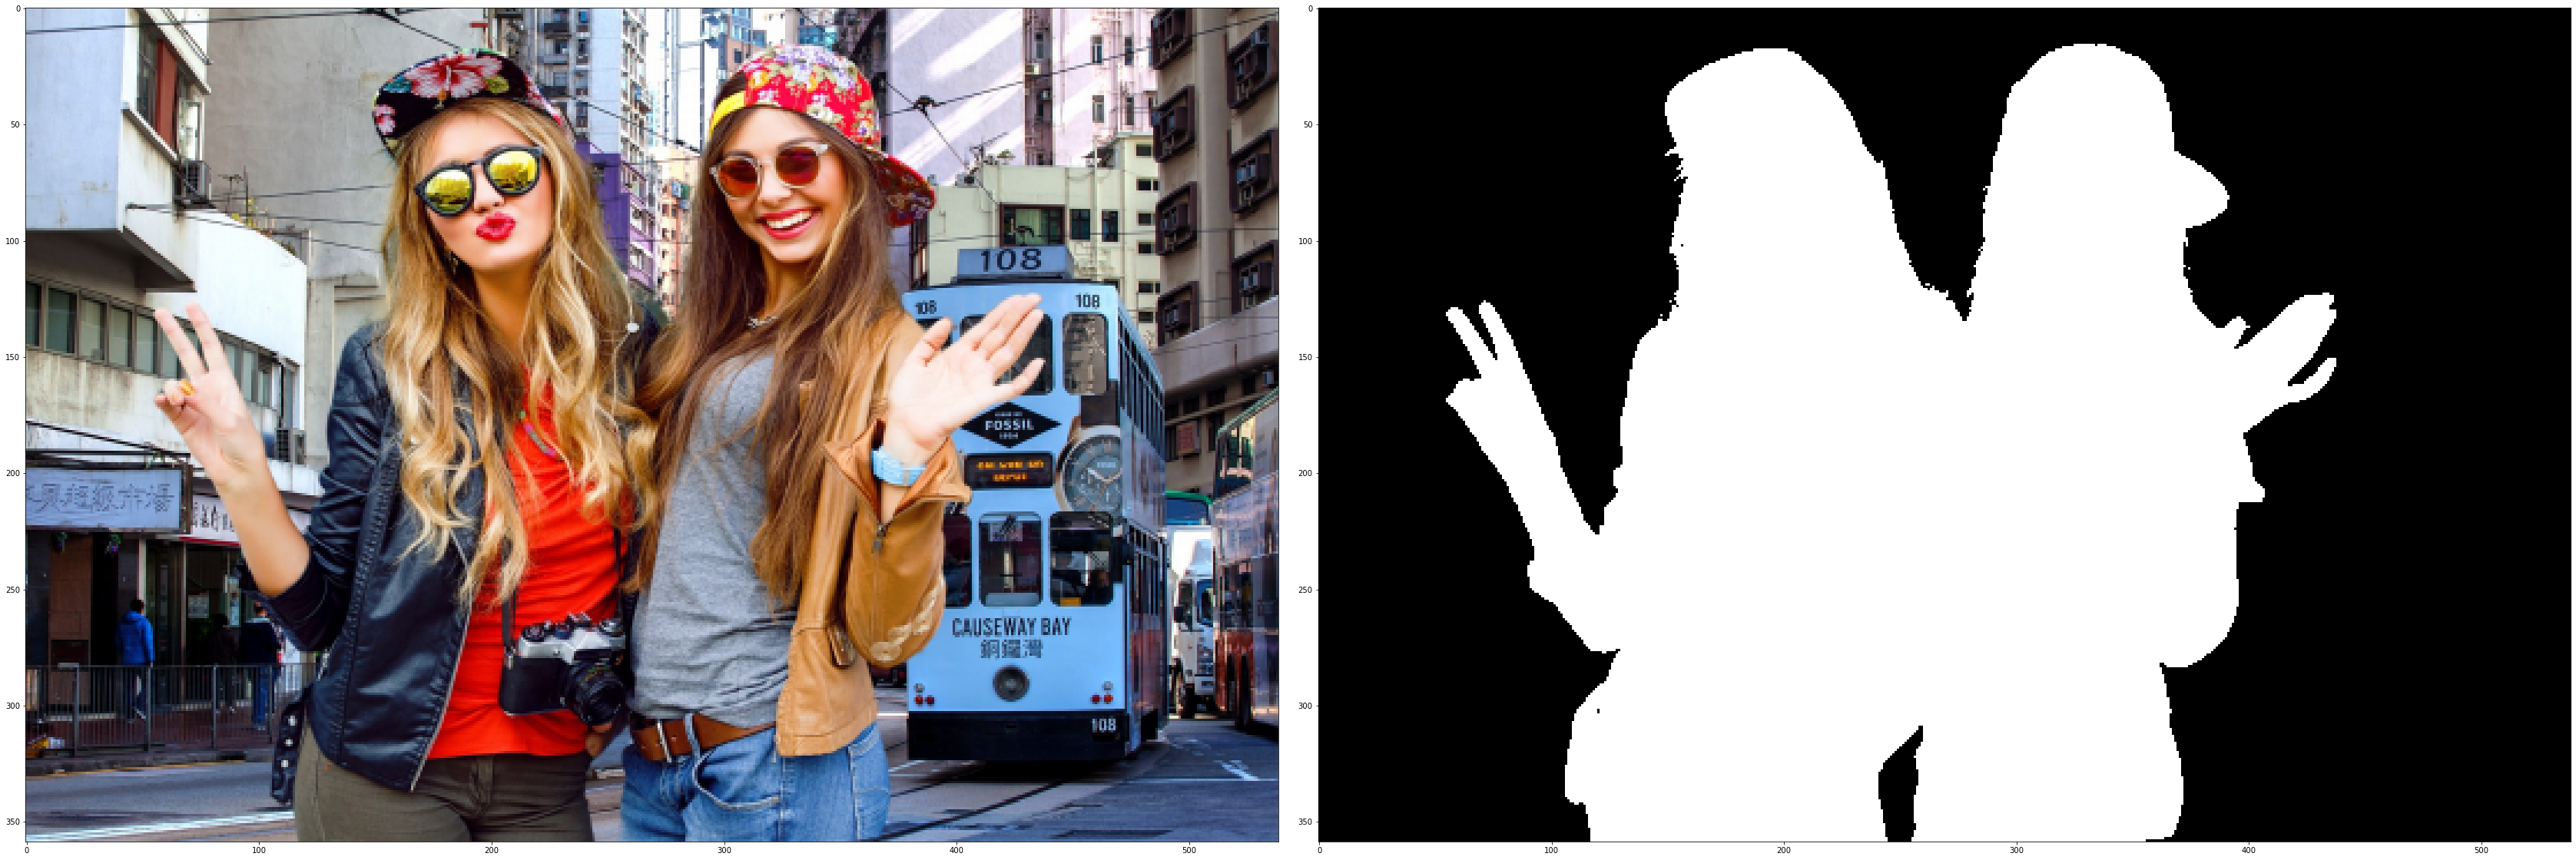

In [3]:
image = data_loader[0]['image']
annotation = data_loader[0]['annotation']
show_all(1, 2, image, annotation);

## Develop new producer

In [4]:
image_num = 0
image = data_loader[image_num]['image']
annotation = data_loader[image_num]['annotation']
info(image)

 <class 'imageio.core.util.Array'>
Shape: (359, 539, 3), Type: uint8, Min-max: (0, 255), Mean: 115.74487814877787


In [5]:
from sep.producers import Producer
class RedsProducer(Producer):
    def segmentation(self, input_data, input_tag):
        redness = np.abs(input_data[...,0] / 255.0 - np.mean(input_data, axis=-1) / 255.0)
        redness[redness < 0.3] = 0.0
        return redness
        
producer = RedsProducer("Reds")

{'run_time': 0.010252986930664452, 'run_fps': 97.53, 'producer_name': 'Reds', 'producer_details': "<class '__main__.RedsProducer'> ({'name': 'Reds'})"}
 <class 'imageio.core.util.Array'>
Shape: (359, 539), Type: float64, Min-max: (0.0, 0.6339869281045751), Mean: 0.01668912352651029


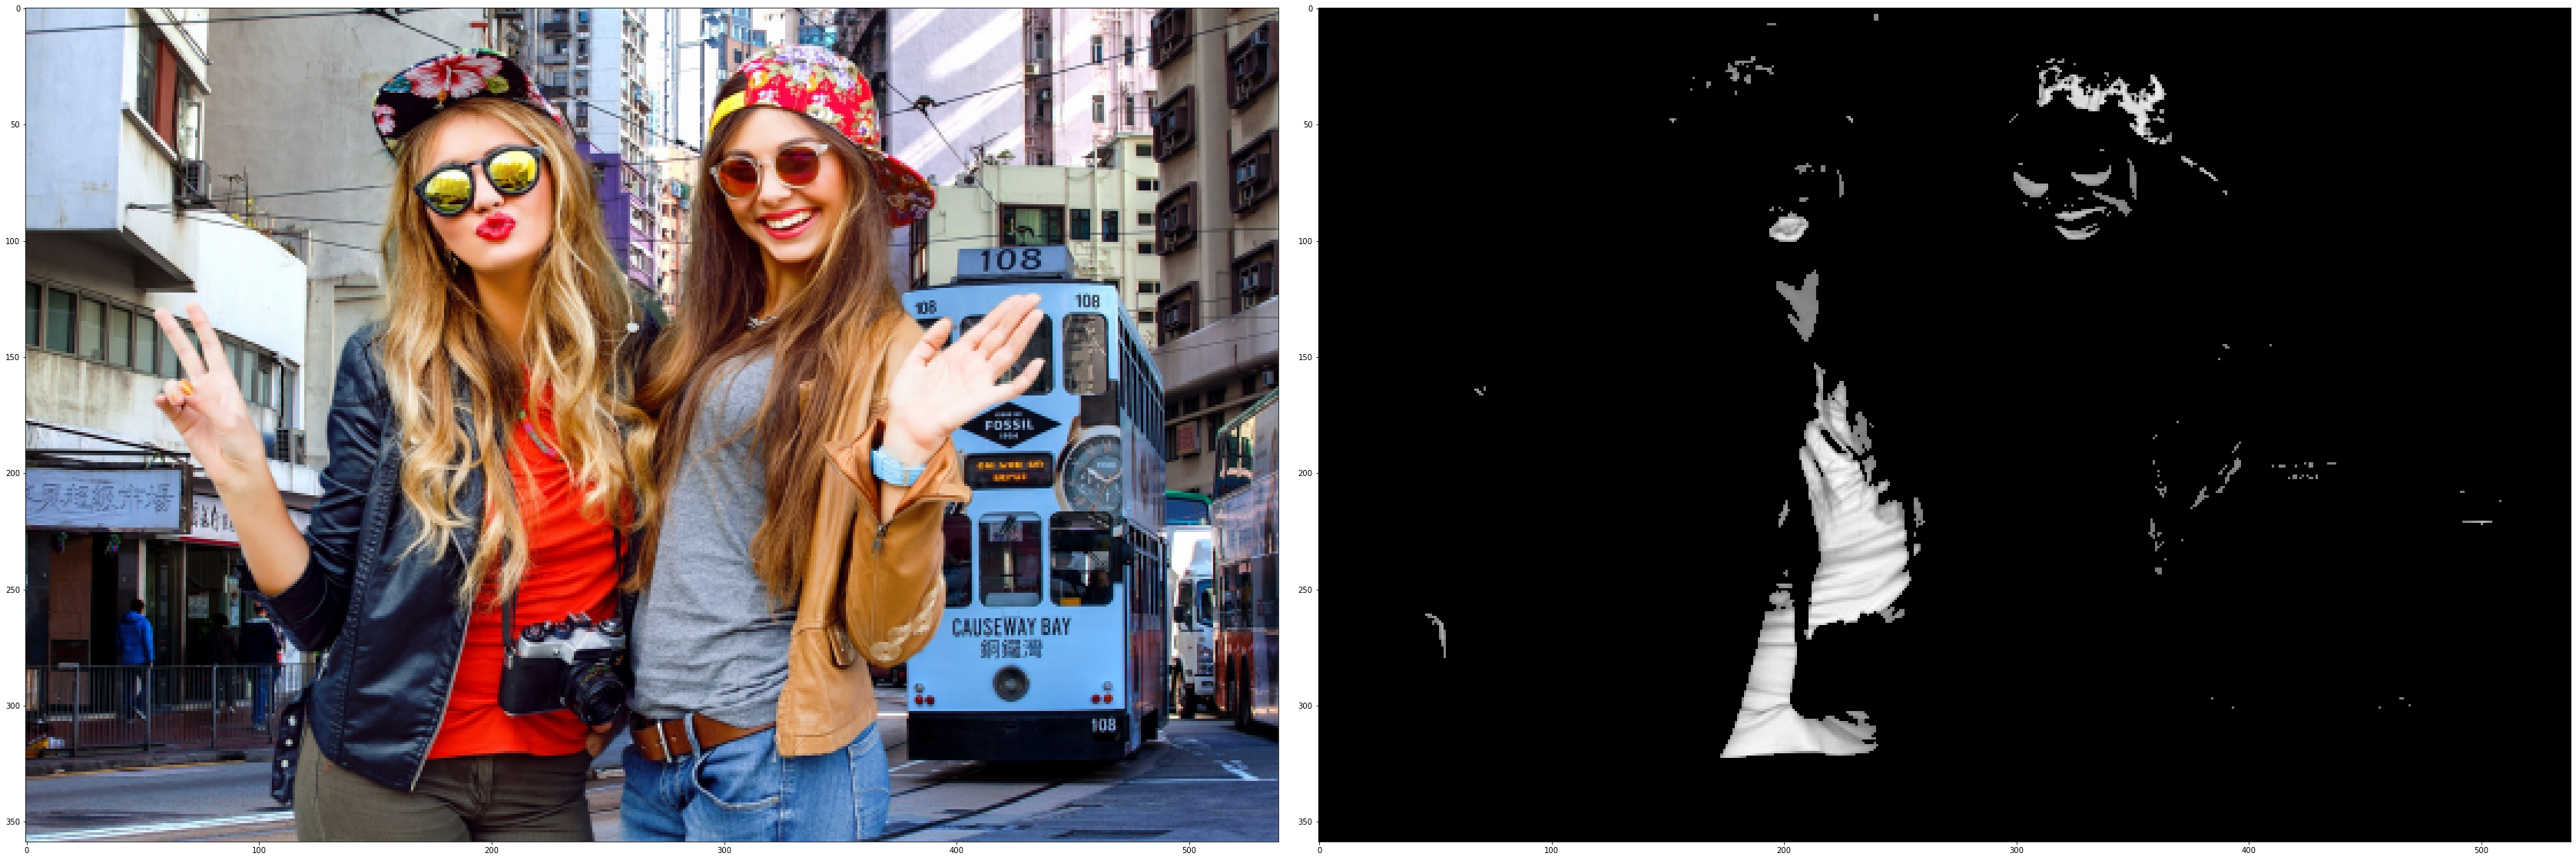

In [6]:
pred, pred_tag = producer.calculate(image, {})
print(pred_tag)
info(pred)
show_all(1, 2, image, pred * 255);

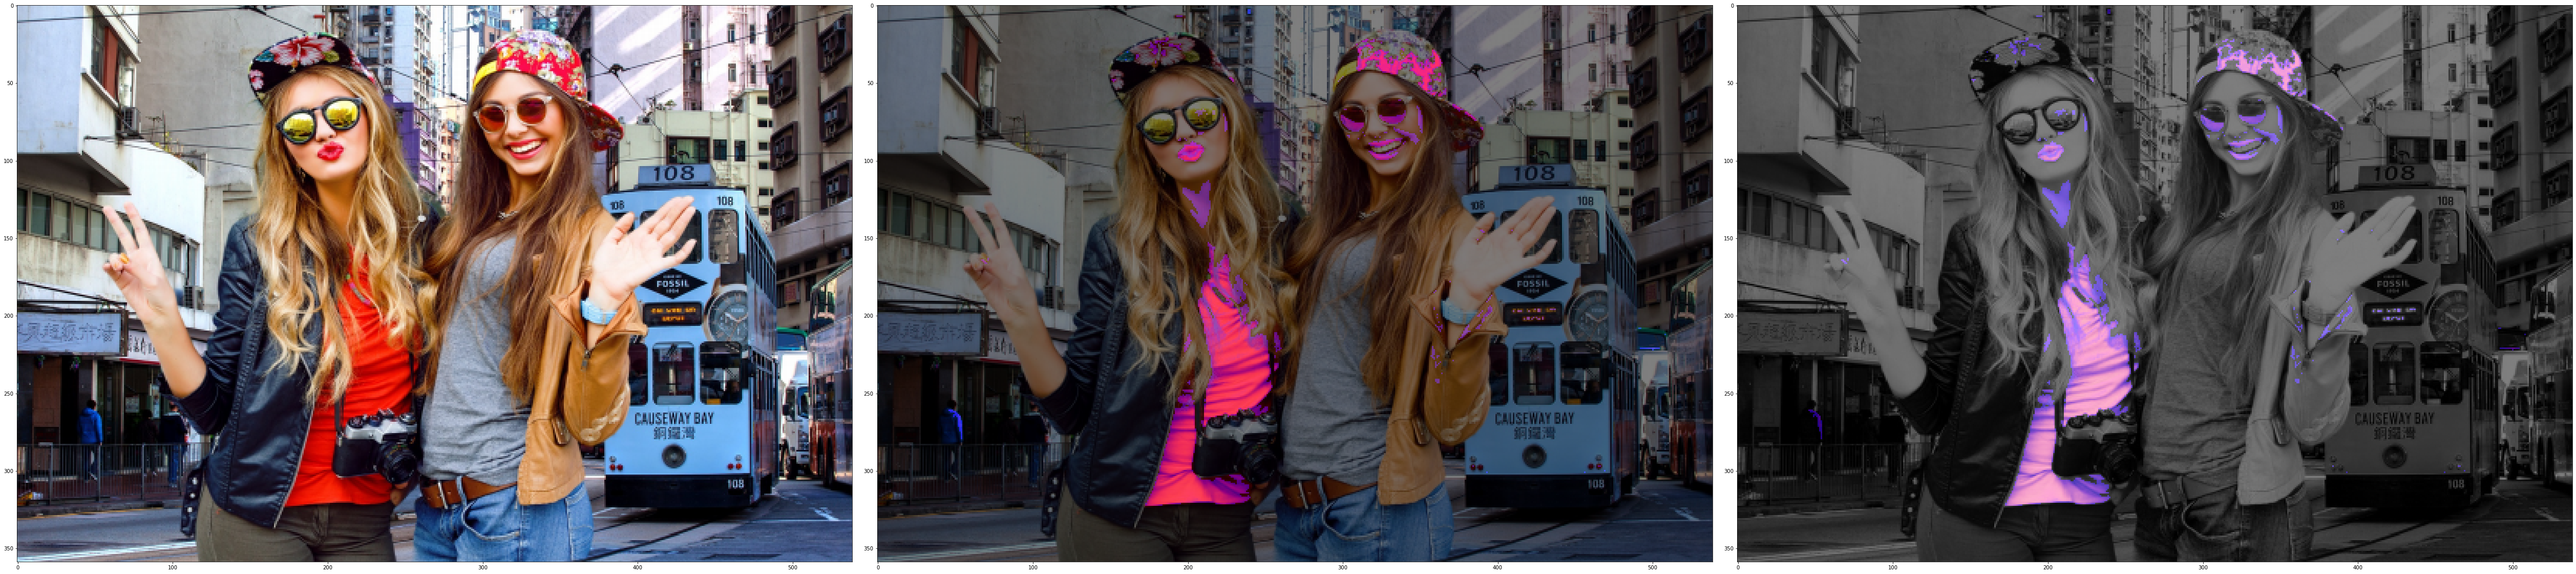

In [7]:
show(image, visuals.overlay_prediction(image, pred), visuals.overlay_prediction(image[...,0], pred))